**Tabela de colunas removidas sem impacto na Gravidade**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_excel('Planilha COVID-19 completa.xlsx', header=1)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
dataset.replace(99999, np.nan, inplace = True)
dataset.replace(99999.0, np.nan, inplace = True)
teste = (dataset.isnull().sum()/dataset.shape[0]) * 100
teste1 = pd.DataFrame(teste,columns=list('A'))
teste1.reset_index(level=0, inplace=True)
teste1 = teste1.rename(columns={'index':'Campos','A': 'Valores'})
teste1.loc[teste1['Valores']>30]
teste1.drop(teste1.loc[teste1['Valores']<30].index, inplace=True)
for ind in teste1.index:
  dataset = dataset.drop(teste1['Campos'][ind], axis=1)
dataset.dropna(inplace=True)
dataset.describe().round(2)
dataset.corr().round(2)
dataset2 = pd.DataFrame(dataset)
dataset2.to_csv('nome_do_arquivo.csv')
dataset3 = pd.read_csv('nome_do_arquivo.csv',encoding='utf-8')

#MELHORAR MODELO= MELHORAR QUALIDADE DOS DADOS = REMOVER COLUNAS QUE CLARAMENTE NAO TEM CONTRIBUIÇÃO DIRETA (EXEMPLO: DATAS)

dataset3 = dataset3[[

 'Classif. OMS modif.',
 'Classif. NIH',
 'Classif. Guideline (7th ed.)',
 'Idade (anos)',
 'Sexo',
 'Tempo de Internação (dias)',
 'Semana Epidemiológica',
 'Febre',
 'Dor de garganta',
 'Tosse seca',
 'Tosse produtiva',
 'Dispnéia / Desconforto respiratório',
 'Astenia',
 'Cefaleia',
 'Saturação de O2 <95',
 'Mal estar geral',
 'Dor em articulações',
 'Dor muscular',
 'Dor abdominal',
 'Diarreia',
 'Vômitos',
 'Alteração do olfato e do paladar',
 'Coriza / Congestão Nasal',
 'Aperto torácico',
 'Dor no corpo',
 'Nauseas',
 'D1',
 'DATA D1',
 'Síndrome de Down',
 'Diabetes',
 'HAS',
 'HIV',
 'Doença cardíaca crônica',
 'Doença hepática crônica',
 'Doença renal crônica',
 'Doença hematológica crônica',
 'Neoplasia',
 'Pneumopatia crônica',
 'Asma',
 'DPOC',
 'Bronquiectasia',
 'DPID',
 'Tuberculose',
 'Doença reumatológica',
 'Obesidade',
 'Uso de imunossupressor',
 'Doença congênita',
 'Desnutrição',
 'Temp. máx (°C)',
 'Pressão SISTOLICA + baixa ',
 'Pressão DIASTOLICA + baixa',
 'F.R mais alta',
 'F.C mais alta',
 'Saturação O2 mais baixa',
 'Suplementação de O2',
 'Suporte ventilatório',
 'Medicação vasopressora',
 'Diálise/hemodiálise',
 'Parada cardiorespiratório',
 'Sepsis',
 'Choque',
 'Falência miocárdica',
 'Infarto miocárdio',
 'Insuficiência renal',
 'Glicemia (HGT)',
 'Leucócitos totais (/μL)',
 ' Plaquetas',
 'TGP',
 'Creatinina',
 'Proteína C reativa (mg/L)',
 'UREIA (mg/dL)',
 'Antibiótico',
 'Antiviral (Oseltamivir)',
 'Anticoagulante (Enoxaparina ou Análogo)',
 'Broncodilatador',
 'Cloroquina / Hidroxicloroquina',
 'Corticoterapia',
 'SRAG',
 'Desfecho',
 'internação - desfecho',
 'Classif. OMS']]

In [7]:
# Lista todas as colunas originais do dataset
original_columns = dataset.columns.tolist()

# Lista todas as colunas no dataset3
dataset3_columns = dataset3.columns.tolist()

# Encontra a diferença entre as colunas originais e as colunas do dataset3
deleted_columns = list(set(original_columns) - set(dataset3_columns))

# Cria um DataFrame para armazenar as informações dos campos deletados
deleted_columns_df = pd.DataFrame(columns=["Posição", "Campo"])

# Preenche o DataFrame com as informações dos campos deletados
for i, col in enumerate(original_columns):
    if col in deleted_columns:
        deleted_columns_df = deleted_columns_df.append({"Posição": i, "Campo": col}, ignore_index=True)

# Imprime o DataFrame em formato de tabela com a coluna "Campo" alinhada à esquerda
print("Campos deletados ao criar dataset3:")
print(deleted_columns_df.to_string(index=False, justify='right'))

Campos deletados ao criar dataset3:
Posição                                                          Campo
      0                                              ORIGEM DA AMOSTRA
      1                                                     Nº INTERNO
      2                                                 Data da coleta
      7                                                Data Nascimento
     10                                        Município de Residencia
     13                                       Data início dos sintomas
     14                                                Data internação
     62                              Fez pelo menos um Rx/TC de tórax?
     80                                                  Realizou PCR?
     81                             Realizou Teste Rápido (ANTICORPO)?
     82                                     Realizou Exame Sorológico?
     83          Realizou Teste de Pesquisa de Antígeno (SWAB RÁPIDO)?
     84 Foi administrado algum antiviral 

<ipython-input-7-61c4a4a954fa>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  deleted_columns_df = deleted_columns_df.append({"Posição": i, "Campo": col}, ignore_index=True)
<ipython-input-7-61c4a4a954fa>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  deleted_columns_df = deleted_columns_df.append({"Posição": i, "Campo": col}, ignore_index=True)
<ipython-input-7-61c4a4a954fa>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  deleted_columns_df = deleted_columns_df.append({"Posição": i, "Campo": col}, ignore_index=True)
<ipython-input-7-61c4a4a954fa>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  deleted_columns_df = deleted_col

In [9]:
dataset = pd.read_excel('Planilha COVID-19 completa.xlsx', header=1)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
dataset.replace(99999, np.nan, inplace=True)
dataset.replace(99999.0, np.nan, inplace=True)
null_percentage = (dataset.isnull().sum() / dataset.shape[0]) * 100
null_percentage_df = pd.DataFrame(null_percentage, columns=list('A'))
null_percentage_df.reset_index(level=0, inplace=True)
null_percentage_df = null_percentage_df.rename(columns={'index': 'Campos', 'A': 'Valores'})
null_percentage_df = null_percentage_df.loc[null_percentage_df['Valores'] > 30]
null_percentage_df.reset_index(drop=True, inplace=True)

# Cria um novo DataFrame para armazenar as informações dos campos deletados
deleted_columns_df = pd.DataFrame(columns=["Posição", "Campo", "Percentual"])

# Preenche o DataFrame com as informações dos campos deletados
for ind, row in null_percentage_df.iterrows():
    position = dataset.columns.get_loc(row['Campos'])
    percentage = row['Valores']
    deleted_columns_df = deleted_columns_df.append({"Posição": position, "Campo": row['Campos'], "Percentual": f"{percentage:.2f}%"}, ignore_index=True)

# Imprime o DataFrame em formato de tabela com a coluna "Campo" alinhada à esquerda
print("Campos deletados com mais de 30% de valores nulos:")
print(deleted_columns_df.to_string(index=False, justify='left'))


Campos deletados com mais de 30% de valores nulos:
Posição Campo                                         Percentual
 10                                          Ocupação 76.93%    
 11                                      Escolaridade 74.74%    
 12                                          Raça/Cor 45.99%    
 13                                    Tipo Sanguíneo 83.07%    
 38                                            Outros 55.62%    
 41                                                D2 87.45%    
 42                                           DATA D2 87.45%    
 43                                                D3 97.81%    
 44                                           DATA D3 97.66%    
 45                                  Vacina influenza 69.78%    
 46                                    Data aplicação 83.80%    
 47                           Vacina antipneumocócica 78.10%    
 48                                  Data aplicação.1 99.27%    
 49                                    

<ipython-input-9-8cce72e49ac1>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  deleted_columns_df = deleted_columns_df.append({"Posição": position, "Campo": row['Campos'], "Percentual": f"{percentage:.2f}%"}, ignore_index=True)
<ipython-input-9-8cce72e49ac1>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  deleted_columns_df = deleted_columns_df.append({"Posição": position, "Campo": row['Campos'], "Percentual": f"{percentage:.2f}%"}, ignore_index=True)
<ipython-input-9-8cce72e49ac1>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  deleted_columns_df = deleted_columns_df.append({"Posição": position, "Campo": row['Campos'], "Percentual": f"{percentage:.2f}%"}, ignore_index=True)
<ipython-input-9-8cce72e49ac1>:20: FutureWa

In [11]:
import pandas as pd

# Carregando a planilha original novamente
dataset_original = pd.read_excel('Planilha COVID-19 completa.xlsx', header=1)

# Obtendo os nomes das colunas dos dois datasets
colunas_original = set(dataset_original.columns)
colunas_dataset3 = set(dataset3.columns)

# Encontrando as colunas que estão no dataset original, mas não estão no dataset3
colunas_diferentes = colunas_original.difference(colunas_dataset3)

# Calculando o percentual de nulos para todas as colunas
percentual_nulos = (dataset_original.isnull().sum() / dataset_original.shape[0]) * 100

# Listando as colunas diferentes com suas posições no dataset original e percentual de nulos
print("Campos do dataset original que não estão no dataset3 e não têm mais de 30% de informações nulas:")
for coluna in colunas_diferentes:
    posicao = dataset_original.columns.get_loc(coluna)
    percentual_nulo = percentual_nulos[coluna]
    
    # Verificando se a coluna tem menos de 30% de informações nulas
    if percentual_nulo <= 30:
        print(f"{coluna} (Posição: {posicao}, Percentual de nulos: {percentual_nulo:.2f}%)")


Campos do dataset original que não estão no dataset3 e não têm mais de 30% de informações nulas:
Data início dos sintomas (Posição: 17, Percentual de nulos: 0.44%)
Município do óbito (Posição: 185, Percentual de nulos: 0.58%)
Principais achados (Posição: 88, Percentual de nulos: 0.58%)
Razão neutrófilo-linfocito (RNL) (Posição: 120, Percentual de nulos: 0.58%)
Foi administrado algum antiviral ou antibiótico na internação? (Posição: 166, Percentual de nulos: 0.58%)
Linfócitos (%) (Posição: 116, Percentual de nulos: 0.58%)
TOMOU VACINA COVID-19? (Posição: 176, Percentual de nulos: 0.58%)
Neutrófilos (%) (Posição: 114, Percentual de nulos: 0.58%)
Pneumotórax (Posição: 94, Percentual de nulos: 0.58%)
Data do resultado da PCR (Posição: 143, Percentual de nulos: 0.58%)
TEMPO DE PROTROMBINA (segundos) (Posição: 139, Percentual de nulos: 0.58%)
BILIRRUBINA DIRETA (MG/DL) (Posição: 128, Percentual de nulos: 0.58%)
Ocupação (Posição: 10, Percentual de nulos: 0.44%)
Data Nascimento (Posição: 7, P

In [14]:
import pandas as pd

# Carregando a planilha original novamente
dataset_original = pd.read_excel('Planilha COVID-19 completa.xlsx', header=1)

# Obtendo os nomes das colunas dos dois datasets
colunas_original = set(dataset_original.columns)
colunas_dataset3 = set(dataset3.columns)

# Encontrando as colunas que estão no dataset original, mas não estão no dataset3
colunas_diferentes = colunas_original.difference(colunas_dataset3)

# Calculando o percentual de nulos para todas as colunas
percentual_nulos = (dataset_original.isnull().sum() / dataset_original.shape[0]) * 100

# Criando um DataFrame para armazenar os resultados
resultados = pd.DataFrame(columns=['Campo', 'Posição', 'Percentual de nulos'])

# Listando as colunas diferentes com suas posições no dataset original e percentual de nulos
for coluna in colunas_diferentes:
    posicao = dataset_original.columns.get_loc(coluna)
    percentual_nulo = percentual_nulos[coluna]
    
    # Verificando se a coluna tem menos de 30% de informações nulas
    if percentual_nulo <= 30:
        resultados = resultados.append({'Campo': coluna, 'Posição': posicao, 'Percentual de nulos': f"{percentual_nulo:.2f}%"}, ignore_index=True)

# Imprimindo a tabela de resultados
print(resultados)

# Salvando os resultados em um arquivo xlsx
resultados.to_excel('resultados_colunas_removidas.xlsx', index=False)

print(f"O dataset3 possui {dataset3.shape[1]} colunas.")


<ipython-input-14-832008da32db>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultados = resultados.append({'Campo': coluna, 'Posição': posicao, 'Percentual de nulos': f"{percentual_nulo:.2f}%"}, ignore_index=True)
<ipython-input-14-832008da32db>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultados = resultados.append({'Campo': coluna, 'Posição': posicao, 'Percentual de nulos': f"{percentual_nulo:.2f}%"}, ignore_index=True)
<ipython-input-14-832008da32db>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultados = resultados.append({'Campo': coluna, 'Posição': posicao, 'Percentual de nulos': f"{percentual_nulo:.2f}%"}, ignore_index=True)
<ipython-input-14-832008da32db>:26: FutureWarning: The frame.append me

                                                 Campo Posição  \
0                             Data início dos sintomas      17   
1                                   Município do óbito     185   
2                                   Principais achados      88   
3                     Razão neutrófilo-linfocito (RNL)     120   
4    Foi administrado algum antiviral ou antibiótic...     166   
5                                       Linfócitos (%)     116   
6                               TOMOU VACINA COVID-19?     176   
7                                      Neutrófilos (%)     114   
8                                          Pneumotórax      94   
9                             Data do resultado da PCR     143   
10                     TEMPO DE PROTROMBINA (segundos)     139   
11                          BILIRRUBINA DIRETA (MG/DL)     128   
12                                            Ocupação      10   
13                                     Data Nascimento       7   
14        

<ipython-input-14-832008da32db>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultados = resultados.append({'Campo': coluna, 'Posição': posicao, 'Percentual de nulos': f"{percentual_nulo:.2f}%"}, ignore_index=True)
<ipython-input-14-832008da32db>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultados = resultados.append({'Campo': coluna, 'Posição': posicao, 'Percentual de nulos': f"{percentual_nulo:.2f}%"}, ignore_index=True)
<ipython-input-14-832008da32db>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultados = resultados.append({'Campo': coluna, 'Posição': posicao, 'Percentual de nulos': f"{percentual_nulo:.2f}%"}, ignore_index=True)
<ipython-input-14-832008da32db>:26: FutureWarning: The frame.append me

In [15]:
# Calculando o percentual de nulos para as colunas do dataset3
percentual_nulos_dataset3 = (dataset3.isnull().sum() / dataset3.shape[0]) * 100

# Imprimindo os campos do dataset3 e seus percentuais de nulos
print("Campos do dataset3 e seus percentuais de nulos:")
for coluna in dataset3.columns:
    percentual_nulo = percentual_nulos_dataset3[coluna]
    print(f"{coluna}: {percentual_nulo:.2f}%")


Campos do dataset3 e seus percentuais de nulos:
Classif. OMS modif.: 0.00%
Classif. NIH: 0.00%
Classif. Guideline (7th ed.): 0.00%
Idade (anos): 0.00%
Sexo: 0.00%
Tempo de Internação (dias): 0.00%
Semana Epidemiológica: 0.00%
Febre: 0.00%
Dor de garganta: 0.00%
Tosse seca: 0.00%
Tosse produtiva: 0.00%
Dispnéia / Desconforto respiratório: 0.00%
Astenia: 0.00%
Cefaleia: 0.00%
Saturação de O2 <95: 0.00%
Mal estar geral: 0.00%
Dor em articulações: 0.00%
Dor muscular: 0.00%
Dor abdominal: 0.00%
Diarreia: 0.00%
Vômitos: 0.00%
Alteração do olfato e do paladar: 0.00%
Coriza / Congestão Nasal: 0.00%
Aperto torácico: 0.00%
Dor no corpo: 0.00%
Nauseas: 0.00%
D1: 0.00%
DATA D1: 0.00%
Síndrome de Down: 0.00%
Diabetes: 0.00%
HAS: 0.00%
HIV: 0.00%
Doença cardíaca crônica: 0.00%
Doença hepática crônica: 0.00%
Doença renal crônica: 0.00%
Doença hematológica crônica: 0.00%
Neoplasia: 0.00%
Pneumopatia crônica: 0.00%
Asma: 0.00%
DPOC: 0.00%
Bronquiectasia: 0.00%
DPID: 0.00%
Tuberculose: 0.00%
Doença reum

In [ ]:
#Speracao dos Dados
previsores = dataset3.iloc[:, 0:80].values # da primeira coluna a penultima
classe     = dataset3.iloc[:,80].values # Coluna Classif OMS

previsores = pd.DataFrame(previsores)
previsores = pd.get_dummies(previsores, drop_first=True)

#Divisão dos Dados
from sklearn.model_selection import train_test_split
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.30, random_state=0)

#Normalizacao dos Dados
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
previsores_treinamento = scaler.fit_transform(previsores_treinamento) # apenas no conjunto de previsores_treinamento
previsores_teste = scaler.transform(previsores_teste) # aplica a transformação aos dados de teste

previsores_outlier = previsores_treinamento.clip(-1,1) # trata valores extremos
previsores_treinamento = previsores_outlier
previsores_teste = previsores_teste.clip(-1,1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold,ShuffleSplit

param_grid = {
      'bootstrap': [True, False],
      'max_depth': [20,25,100],
      'max_features': ['auto', 'sqrt'],
      'min_samples_leaf': [3, 4, 5],
      'min_samples_split': [2, 5],
      'n_estimators': [100, 200]
}

classifier = RandomForestClassifier()

#A busca de hiperparâmetros é realizada usando cross-validation de 10 vezes (cv=10)
grid_search = GridSearchCV(estimator = classifier, param_grid = param_grid, 
                            cv = 10, n_jobs = -1, verbose = 2)
  
X_train, X_test = previsores_treinamento, previsores_teste
y_train, y_test = classe_treinamento, classe_teste

#Uma vez que já achou os melhores parametros para a floresta randomica,
# e que isso demora muito pra fazer, por sinal, as linhas abaixo podem ficar comentadas
#grid_search.fit(X_train, y_train)
#print(grid_search.best_params_)

In [ ]:
# 3) Demanda-3- Tirei a estrutura de repetição for e calculei a validação cruzada corretamente
# Observação 1: a validação cruzada se faz na parte do treino
# Observação 2 : tinha criado um array de 10 modelos, o que é desnecessário por isso foi pedido para "tirar o for"

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold,ShuffleSplit
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.metrics import precision_score
import statistics
from sklearn.metrics import f1_score

#Cria modelo
logistic_regression= LogisticRegression(random_state=1)
logistic_regression_sem_treino = logistic_regression

#Treina o modelo
logistic_regression.fit(X_train,y_train)

#matriz de confusão
y_pred=logistic_regression.predict(X_test)
matrix =confusion_matrix(y_test,y_pred)

#Cros_validação para acuracia e precisao
precisao = cross_validate(logistic_regression, X_train,y_train,scoring='precision_weighted', cv=10)
acuracia = cross_validate(logistic_regression, X_train, y_train, cv=10, scoring='accuracy')

# calcula f1-score
f1 = cross_validate(logistic_regression, X_train, y_train, cv=10, scoring='f1_weighted')

print("Acurácia = " + str(acuracia['test_score'].mean()))
print("Precisão = "+ str(precisao['test_score'].mean()))
print("F1-score = "+ str(f1['test_score'].mean()))

#print(classification_report(y_test,logistic_regression.predict(X_test)))

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Pr

Acurácia = 0.9130718954248367
Precisão = 0.8896113690231339
F1-score = 0.894855595290378


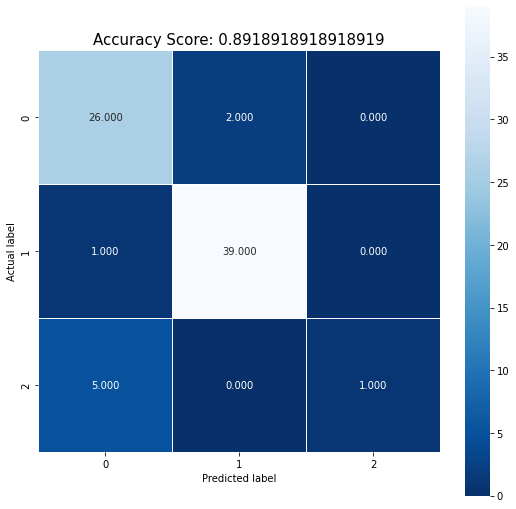

In [ ]:
#matriz de confusão - Modelo de Regressão Logistica

plt.figure(figsize=(9,9))
sns.heatmap(matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size = 15);


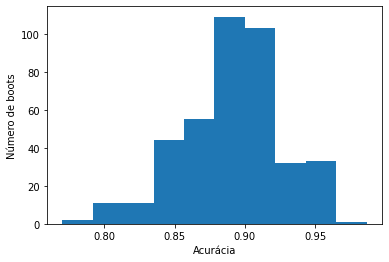

Intervalo de confiança : [0.8108108108108109,0.9459459459459459]
Acurácia 'real' do modelo performada no teste : 0.8918918918918919


In [ ]:
import random
import numpy as np
import plotly.express as px

# Intervalo de confiança da acurácia da regressão logística

# cria boot de acordo com as regras do artigo : 1- size_test= size_boot , 2- repetições permitidas
# Notar que, obiviamente, o cálculo da confiança da métrica acurácia usa o X_test

# BOOT COMO NUMPY.ARRAY AO INVES DE DATAFRAME - MELHROU MT

def new_boot(X_test, y_test):
  novo_X = X_test.copy()

  novo_Y = y_test.copy()

  c= 0
  while c < len(X_test):
    rand = random.randint(0, len(X_test) - 1)
    if rand < len(X_test):
        novo_X[c] = X_test[rand].copy()
        novo_Y[c] = y_test[rand]
        c += 1

  return novo_X , novo_Y


# Pega a acurácia de um boot
# Ajuste em pegar a mérica sem ser pelo report
def pegar_acuracia_do_relatorio(novo_X , novo_Y):
                     
  return accuracy_score(novo_Y, logistic_regression.predict(novo_X), sample_weight=None)

# calcula a distribuição dos boots
  
numero_boots = 401
lista_boots = []
contador = 0

while contador < numero_boots:
  x, y = new_boot(X_test, y_test)
  lista_boots.append(pegar_acuracia_do_relatorio(x, y))
  contador =contador +1

plt.hist(lista_boots) 
plt.xlabel('Acurácia')
plt.ylabel('Número de boots')
plt.show() 

#converte a lista em float explicitamente para a função percentile ser aplicada
array = list()
for elemento in lista_boots:
  array.append(float(elemento))

# calcula os limites da integral da gaussiana que correspondem a área desejada

alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower =  np.percentile(array, p) 
p = (alpha+((1.0-alpha)/2.0)) * 100
upper =  np.percentile(array, p)

print("Intervalo de confiança : ["+str(lower)+","+str(upper)+"]")
print("Acurácia 'real' do modelo performada no teste : "+ str(accuracy_score(y_test, logistic_regression.predict(X_test), sample_weight=None)))


# Observação, de acordo com o teorema do limite central, quanto maior o número de boots, mais a distribuição gaussiana ficará melhor definida.


In [ ]:
#rede neural - Modelo
#documentar a simplicidade da RN
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold,ShuffleSplit
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import classification_report

#4) Demanda-4- Implementar para cada modelo as regras anteriores

model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(64,64,64), max_iter = 100000, random_state=0) 
model_sem_treino = model
model.fit(X_train,y_train)

#matriz de confusão
y_pred=model.predict(X_test) 
matrix=confusion_matrix(y_test,y_pred)

#cross validation para obter a acurácia e a precisão , k =cv =10
#Cros_validação para acuracia e precisao
precisao = cross_validate(model, X_train,y_train,scoring='precision_weighted', cv=10)
acuracia = cross_validate(model, X_train, y_train, cv=10, scoring='accuracy')        
f1       = cross_val_score(model, X_train, y_train, cv=10, scoring='f1_weighted')

print("Acurácia = " + str(acuracia['test_score'].mean()))
print("Precisão = " + str(precisao['test_score'].mean()))
print("F1-score: {:.2f} (+/- {:.2f})".format(f1.mean(), f1.std() * 2))

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Pr

Acurácia = 0.9189542483660131
Precisão = 0.8909164365046719
F1-score: 0.90 (+/- 0.14)


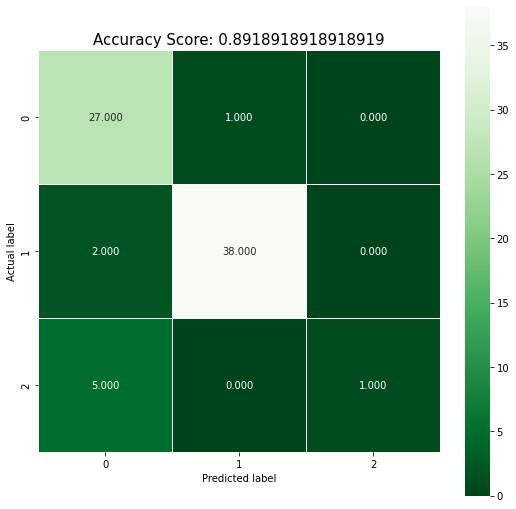

In [ ]:
#Matriz de Confusão da Rede Neural
plt.figure(figsize=(9,9))
sns.heatmap(matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Greens_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size = 15);

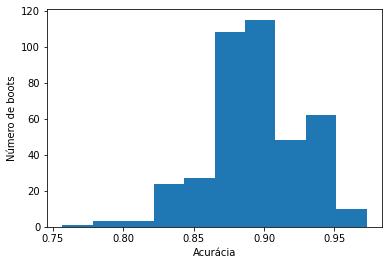

Intervalo de confiança : [0.8243243243243243,0.9459459459459459]
Acurácia 'real' do modelo performada no teste : 0.8918918918918919


In [ ]:
import random
import numpy as np
import plotly.express as px

# Intervalo de confiança da acurácia da rede neural

# cria boot de acordo com as regras do artigo : 1- size_test= size_boot , 2- repetições permitidas
# Notar que, obiviamente, o cálculo da confiança da métrica acurácia usa o X_test

# BOOT COMO NUMPY.ARRAY AO INVES DE DATAFRAME - MELHROU MUITO

def new_boot(X_test, y_test):
  novo_X = X_test.copy()

  novo_Y = y_test.copy()

  c= 0
  while c < len(X_test):
    rand = random.randint(0,len(X_test)-1)
    novo_X[c] = X_test[rand].copy()
    novo_Y[c] = y_test[rand]
    c= c+1
  
  return novo_X , novo_Y

# Pega a acurácia de um boot
# Ajuste em pegar a mérica sem ser pelo report
def pegar_acuracia_do_relatorio(novo_X , novo_Y):
                     
  return accuracy_score(novo_Y, model.predict(novo_X), sample_weight=None)

# calcula a distribuição dos boots  
numero_boots = 401
lista_boots = []
contador = 0

while contador < numero_boots:
  x, y = new_boot(X_test, y_test)
  lista_boots.append(pegar_acuracia_do_relatorio(x, y))
  contador =contador +1

plt.hist(lista_boots) 
plt.xlabel('Acurácia')
plt.ylabel('Número de boots')
plt.show() 

#converte a lista em float explicitamente para a função percentile ser aplicada
array = list()
for elemento in lista_boots:
  array.append(float(elemento))

# calcula os limites da integral da gaussiana que correspondem a área desejada

alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower =  np.percentile(array, p) 
p = (alpha+((1.0-alpha)/2.0)) * 100
upper =  np.percentile(array, p)

print("Intervalo de confiança : ["+str(lower)+","+str(upper)+"]")
print("Acurácia 'real' do modelo performada no teste : "+ str(accuracy_score(y_test, model.predict(X_test), sample_weight=None)))

# Observação, de acordo com o teorema do limite central, quanto maior o número de boots, mais a distribuição gaussiana ficará melhor definida.

In [ ]:
#Floresta Randomica - Modelo
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, ShuffleSplit, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

modelRF = RandomForestClassifier(bootstrap=False, max_depth=20, 
                                 max_features='auto', min_samples_leaf=3,
                                 min_samples_split=2, n_estimators=200)

modelRF_sem_treino = modelRF
modelRF.fit(X_train, y_train)

y_pred = modelRF.predict(X_test)
matrix = confusion_matrix(y_test, y_pred)

precisao = cross_val_score(modelRF, X_train, y_train, scoring='precision_weighted', cv=10)
acuracia = cross_val_score(modelRF, X_train, y_train, cv=10, scoring='accuracy')
f1 = cross_val_score(modelRF, X_train, y_train, cv=10, scoring='f1_weighted')

print("Acurácia: {:.2f} (+/- {:.2f})".format(acuracia.mean(), acuracia.std() * 2))
print("Precisão: {:.2f} (+/- {:.2f})".format(precisao.mean(), precisao.std() * 2))
print("F1-score: {:.2f} (+/- {:.2f})".format(f1.mean(), f1.std() * 2))


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr

Acurácia: 0.81 (+/- 0.15)
Precisão: 0.76 (+/- 0.17)
F1-score: 0.78 (+/- 0.17)


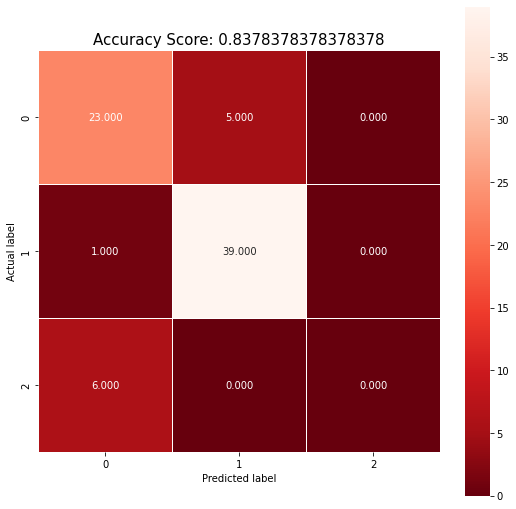

In [ ]:
#Matriz de Confusão Floresta Randomica
plt.figure(figsize=(9,9))
sns.heatmap(matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Reds_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size = 15);

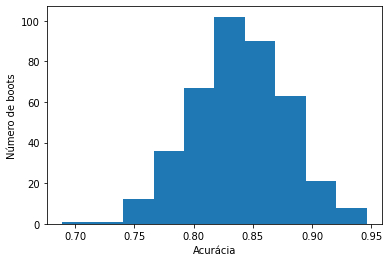

Intervalo de confiança : [0.7567567567567568,0.918918918918919]
Acurácia 'real' do modelo performada no teste : 0.8378378378378378


In [ ]:
# Intervalo de confiança da acurácia da regressão logística
import random
import numpy as np
import plotly.express as px

# cria boot de acordo com as regras do artigo : 1- size_test= size_boot , 2- repetições permitidas
# Notar que, obiviamente, o cálculo da confiança da métrica acurácia usa o X_test

# BOOT COMO NUMPY.ARRAY AO INVES DE DATAFRAME - MELHROU MT

def new_boot(X_test, y_test):
  novo_X = X_test.copy()

  novo_Y = y_test.copy()

  c= 0
  while c < len(X_test):
    rand = random.randint(0,len(X_test)-1)
    novo_X[c] = X_test[rand].copy()
    novo_Y[c] = y_test[rand]

    c= c+1
  

  return novo_X , novo_Y

# Pega a acurácia de um boot
# Ajuste em pegar a mérica sem ser pelo report
def pegar_acuracia_do_relatorio(novo_X , novo_Y):
                     
  return accuracy_score(novo_Y, modelRF.predict(novo_X), sample_weight=None)

# calcula a distribuição dos boots
  
numero_boots = 401
lista_boots = []
contador = 0

while contador < numero_boots:
  x, y = new_boot(X_test, y_test)
  lista_boots.append(pegar_acuracia_do_relatorio(x, y))
  contador =contador +1

plt.hist(lista_boots) 
plt.xlabel('Acurácia')
plt.ylabel('Número de boots')
plt.show() 

#converte a lista em float explicitamente para a função percentile ser aplicada
array = list()
for elemento in lista_boots:
  array.append(float(elemento))

# calcula os limites da integral da gaussiana que correspondem a área desejada
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower =  np.percentile(array, p) 
p = (alpha+((1.0-alpha)/2.0)) * 100
upper =  np.percentile(array, p)

print("Intervalo de confiança : ["+str(lower)+","+str(upper)+"]")
print("Acurácia 'real' do modelo performada no teste : "+ str(accuracy_score(y_test, modelRF.predict(X_test), sample_weight=None)))

# Observação, de acordo com o teorema do limite central, quanto maior o número de boots, mais a distribuição gaussiana ficará melhor definida.

O resultado dos testes mostram que não há diferença significativa entre a Regressão Logística e a Rede Neural (p > 0,05), mas há diferença significativa entre a Regressão Logística e a Floresta Randomica (p < 0,05). Isso significa que, **com base nesses testes**, a **Floresta Randomica** é a melhor opção entre os três modelos avaliados.

O **resultado dos testes** mostram que não há diferença significativa entre a Regressão Logística e a Rede Neural (p > 0,05), mas há diferença significativa entre a Regressão Logística e a Floresta Randomica (p < 0,05). Isso significa que, com base nesses testes, a Floresta Randomica é a melhor opção entre os três modelos avaliados.

In [ ]:
# ttest - Regressão Logistica e Rede neural
from mlxtend.evaluate import paired_ttest_5x2cv

t, p = paired_ttest_5x2cv(estimator1=logistic_regression_sem_treino,estimator2=model_sem_treino,X=previsores, y=classe)
alpha = 0.05

print('t statistic: %.3f' % t)
print('aplha ', alpha)
print('p value: %.3f' % p)

if p > alpha:
  print("Fail to reject null hypotesis")
else:
  print("Reject null hypotesis")

t statistic: -1.852
aplha  0.05
p value: 0.123
Fail to reject null hypotesis


In [ ]:
from mlxtend.evaluate import paired_ttest_5x2cv

# ttest - Rede Neural e Floresta randomica

t, p = paired_ttest_5x2cv(estimator1=model_sem_treino,estimator2=modelRF_sem_treino,X=previsores, y=classe)
alpha = 0.05

print('t statistic: %.3f' % t)
print('aplha ', alpha)
print('p value: %.3f' % p)

if p > alpha:
  print("Fail to reject null hypotesis")
else:
  print("Reject null hypotesis")

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

t statistic: 2.260
aplha  0.05
p value: 0.073
Fail to reject null hypotesis


In [ ]:
from mlxtend.evaluate import paired_ttest_5x2cv

# ttest - Regressão e Floresta randomica

t, p = paired_ttest_5x2cv(estimator1=logistic_regression_sem_treino,estimator2=modelRF_sem_treino,X=previsores, y=classe)
alpha = 0.05

print('t statistic: %.3f' % t)
print('aplha ', alpha)
print('p value: %.3f' % p)

if p > alpha:
  print("Fail to reject null hypotesis")
else:
  print("Reject null hypotesis")

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

t statistic: 3.303
aplha  0.05
p value: 0.021
Reject null hypotesis
